In [8]:
import pandas as pd
import numpy as np
import scipy as ss
import scipy.stats as ss
from scipy.stats import norm

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import math
import seaborn as sns

import scipy.stats as ss
from scipy.stats import norm
import scipy.optimize as so
from scipy.optimize import fsolve

In [9]:
def kawaharaCosEqnsPos(U, a1, alpha, beta, sigma, N): #defining the equation
    kawaharaCosEqnsPos=np.zeros(N+2,dtype='float64') #first set all the equations equal to 0=0
    
    
    V=U[0] #Vector U contains the unknown coefficients and the unknown speed, we have N+2 unknowns
    a=U[1::]
    
    ### for the coefficients ###
    
    for k in range(N+1):
        sum1=0.#set the sums for the nonlinear term equal to 0 when solving for every coefficient
        sum2=0.
        for n in range(k,N+1):
            sum1=sum1+a[n]*a[n-k] 
        for n in range(0,k):
            sum2=sum2+a[n]*a[k-n] 
        kawaharaCosEqnsPos[k]=((V*a[k] + 1./2.*sigma*sum1 + 1./2.*sigma*sum2 - alpha*k**2*a[k] + beta*k**4*a[k]))
        
        #print(F[k])
    kawaharaCosEqnsPos[N+1]=-a1+a[1] #for the last equation, linearize to obtain an equation for speed
    return kawaharaCosEqnsPos
            

/var/folders/8f/ms98g78j5vz0vnknq4rmjbwm0000gn/T/ipykernel_700/4083352345.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for i in range(1,np.int(conSteps)):  #continuation step loop


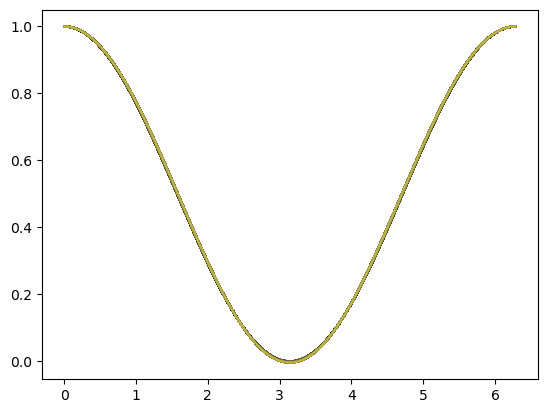

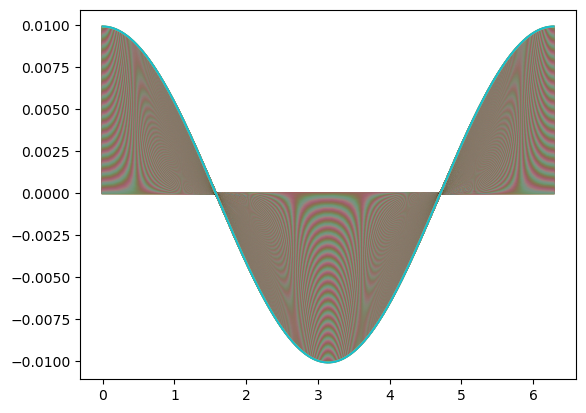

In [18]:
###### here is the stability computation all in one area ######
###############################################################

# declaring some constants
thirdAlpha = 1.
fifthBeta =1/4
nonlinSigma = 1.
c = thirdAlpha - fifthBeta
L = (np.pi)*2
spacex = np.linspace(0,L,501);
conSteps =1500 # number of continuation steps
a1=1.0e-6 # beginning amplitude
aF=1.0e-2 # ending amplitude
aS = np.linspace(a1,aF,conSteps) # vector of free parameter a1 (amplitudes)
velocities=np.zeros(conSteps) # Tracks all the velocities for bifurcation branch
NN=21 # number of modes at which the Fourier series is truncated 
uguess = np.zeros(NN+2)


uguess[0]=c # uguess is our initial guess vector, it has zeros everywhere, except for first two elements: c and a1
uguess[1] =a1
V=c
for k in range(conSteps):


    solution=fsolve(kawaharaCosEqnsPos, uguess, args=(aS[k], thirdAlpha, fifthBeta, nonlinSigma, NN),xtol=1.e-8) #notice amplitude changes with every iteration
    soln=solution[1::] #all the As (excludes speed)

    V = solution[0]
    uguess=np.concatenate((V,solution[1],aS[k],solution[3::]),axis=None) #update initial guess
    

# generating the solution in real space made of cosines
    phi = soln[0]*np.cos(0.*spacex);
    phix = -0.*soln[0]*np.sin(0.*spacex)
    ii = 0.
    for aii in soln[1:]:
        ii = ii+1.
        phi = phi + aii*np.cos(ii*spacex)
        phix = phix - (ii)*aii*np.sin(ii*spacex)





    velocities[k]=solution[0]



# rescaling to get zero average
    phi = phi - soln[0]
    V = V - 2.*soln[0]

    plt.plot(spacex,phi)

Text(0, 0.5, 'u(x)')

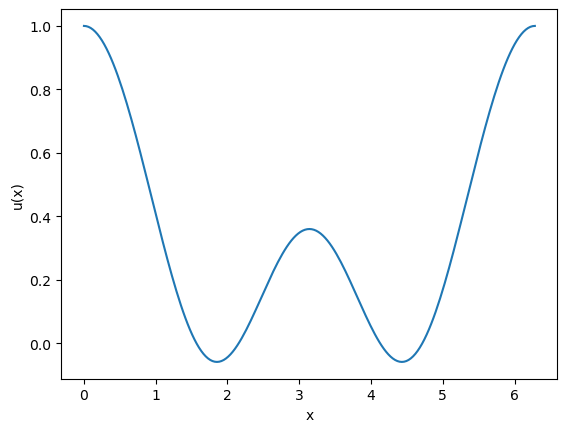

In [4]:
plt.plot(x,phi/max(abs(phi))) 
plt.xlabel('x')
plt.ylabel('u(x)')

Text(0, 0.5, 'amplitude')

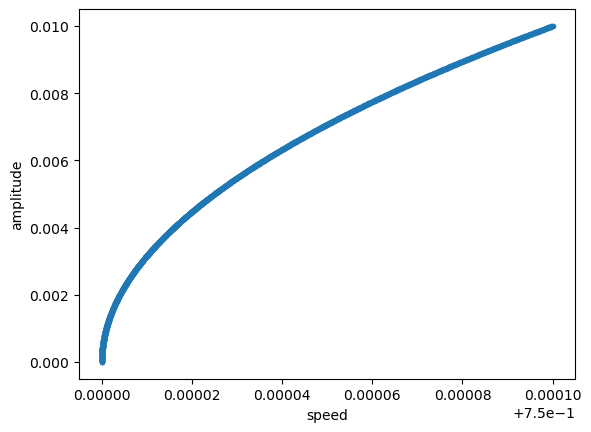

In [17]:
### a1 vs. v ###

plt.plot(velocities,aS,'.')

# plt.xlim([0.756,0.7575]) #zoom
# plt.ylim([0.15,0.19])

# plt.xlim([0.5,0.7])
# plt.ylim([0.,0.5])

# plt.xlim([0.750,0.9])
# plt.ylim([0.15,0.5])
# plt.ylim([0.0,0.51])
#plt.xlim([0.960,1.08])
plt.xlabel('speed')
plt.ylabel('amplitude')

In [5]:
def eq3(x):
    equation=-2*x+2
    return equation
fsolve(eq3, 0)

array([1.])

In [ ]:
## OLD CELL 

from IPython.display import clear_output
a1 = 1e-6 #starting amplitude
conSteps = 1500 #continuation steps
aF = 1.0e-2  # (was 0.5) final amplitude


aS = np.linspace(a1,aF,conSteps) #
N = 22 # was 7


L = 2*np.pi;        #period
x = np.linspace(0,L,501) #define space


### parameters ###

alpha=1
beta=1/(N**2+1) 
beta=1/4 # was 1/5
sigma=1
c=alpha-beta  

aguess = np.zeros(N+2) 
uguess = np.zeros(N+2)
aguess[1] = a1

uguess[0] = c #uguess is our initial guess vector, it has zeros everywhere, except for first two elements: c and a1
uguess[1:N+1] = aguess[1:N+1]

v=np.zeros(conSteps+1) #the speed vector that will contain all speeds for different contsteps/amplitudes

for i in range(1,np.int(conSteps)):  #continuation step loop  
    
    solution=fsolve(kawaharaCosEqnsPos, uguess, args=(aS[i], alpha, beta, sigma, N),xtol=1.e-8) #notice amplitude changes with every iteration

    V = solution[0]
    v[i+1] = solution[0] #index shift since the loop starts from 1 and not 0

    a1 = solution[2] #solution[0]=speed, solution[1]=a0

    aguess = np.concatenate((V,solution[2],aS[i],solution[3::]),axis=None) #update initial guess
    
    uguess = aguess


    soln=solution[1::] #all the As (excludes speed)
    phi = soln[1]*np.cos(0.*x)
    for f in range(1,(len(soln)-1)):
        phi = phi + soln[f]*np.cos((f)*x) #phi is u

    #plt.plot(x,phi/max(abs(phi)))
    #if 0.55<=max(abs(phi))<=0.6:

    plt.plot(x,phi/max(abs(phi)))
#note how the wave profile is normalized 
        
    

    #plt.ylim([0,0.5])